In [85]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [86]:
limitx, limity = 10,10

'''
    :param: limitx > 0 
    :type: int
    :param: limity > 0
    :type: int
    
    User can define plot limit set in variables: limitx and limity
    limitx and limity are the limits of the plot of the x and y coordinates.
    
    You can set the limit to 1 but that's dumb and kind of defeats the purpose of this project.
    Recommended to set limit to at least 10
    
    For now, we set limitx = limity = 10
'''

limsy = (0, limity) #setting graph coordinates from 0 to limity=10
limsx = (0, limitx)

In [87]:
def generate_rectangle():
    
    '''
    This generates a rectangle on the plot with limits specified by user
    
    Width and height are of uniform distribution of 1 until the ceiling limit
    
    rect_param stores the rectangle parameters as [starting point coord, width, height] 
    We will put all rectangle parameters in rect_master for use in trimming
    
    If through trimming we get a rectangle that has width or height trimmed to 0, we generate another rectangle. 
    This ensures that we don't put down a network rectangle that has no area.
    
    '''
    
    while True:
    
        starting_point = [random.randint(0,limitx-1),random.randint(0,limity-1)] #starting at ceiling wont do anything    
        width = random.randint(1,limitx - starting_point[0])
        height = random.randint(1,limity - starting_point[1])

        '''
        trim rectangle, see if it is valid (ie. nonzero height and width)
        if it is valid, break the loop and generate the according rectangle
        '''
        rect_param = trim_rectangle(starting_point, width, height) 
        starting_point,width,height = rect_param[0],rect_param[1],rect_param[2]
        
        if width != 0 or height != 0:
            break
        
    rect_master.append(rect_param)
    
    
    color = (random.random(),random.random(),random.random())
    ax1.add_patch(patches.Rectangle(starting_point, width, height, facecolor = color))
    plt.ylim(limsy)
    plt.xlim(limsx)
    

In [88]:
def trim_rectangle(starting_point, width, height):
    '''
    
    :param starting_point: new randomly generated starting coordinates of the rectangle as [x,y]
    :type starting_point: list
    
    :param width: new randomly generated width
    :type width: int
    
    :param height: new randomly generated height
    :type height: int

    :returns rect_param: returns the trimmed rectangle parameters as [starting_point, width, height]
    :type rect_param: list
    
    
    
    This is the bulk of the project. 
    The function trim_rectangle grabs the 3 input arguments starting_point, width, height from generate_rectangle. 
    It then trims the current rectangle based on the cases documented below. 
    
    For reference, each rectangle's vertices will be referred to as
    
    C ---- D
    |      |
    A ---- B
    
    There are 8 cases to consider: (10?)
    1. If new A is within previous rectangle
    2. If new B is within previous rectangle
    3. If new C is within previous rectangle    
    4. If new D is within previous rectangle
    5. If new top/bottom protrudes out of previous rectangle
        - following subcases:
            1. check top and bottom protrudes
            2. check top protrudes and bottom is within previous rectangle
            3. check bottom protrudes and top is within previous rectangle
    6. If new left/right protrudes out of previous rectangle
        - following subcases:
            1. check left and right protrudes
            2. check left protrudes and right is within previous rectangle
            3. check right protrudes and left is within previous rectangle
    7. If entire rectangle is contained within previous rectangle
    8. If entire rectangle encompasses previous rectangle


    '''
    
    rect_param = []
    
    #check if starting point is within previous rectangle(s)
    for i in range(0, len(rect_master)):
        '''rect_master documentation explained below in main program'''

        
        '''begin cases 1-4'''
        if starting_point[1]+height > rect_master[i][0][1]+rect_master[i][2] and starting_point[0] >= rect_master[i][0][0] and starting_point[0] < rect_master[i][0][0]+rect_master[i][1] and starting_point[1] >= rect_master[i][0][1] and starting_point[1] < rect_master[i][0][1]+rect_master[i][2]:       
            "Case 1: A is within previous rectangle"
            
            '''trim either bottom or left side'''
            if (width-rect_master[i][0][0]-rect_master[i][1]+starting_point[0])*(height) > (height-rect_master[i][0][1]-rect_master[i][2]+starting_point[1])*width:
                '''if vertical rectangle is greater than horizontal rectangle'''
                width = width-rect_master[i][0][0]-rect_master[i][1]+starting_point[0]
                starting_point[0] = rect_master[i][0][0]+rect_master[i][1]
                "trimmed left A"
                continue
                
            else:
                height = height-rect_master[i][0][1]-rect_master[i][2]+starting_point[1]
                starting_point[1] = rect_master[i][0][1]+rect_master[i][2]
                "trimmed bottom A"
                continue
                
        if starting_point[1] >= rect_master[i][0][1] and starting_point[0] < rect_master[i][0][0] and starting_point[0]+width > rect_master[i][0][0] and starting_point[0]+width <= rect_master[i][0][0]+rect_master[i][1] and starting_point[1] < rect_master[i][0][1]+rect_master[i][2] and starting_point[1]+height > rect_master[i][0][1]+rect_master[i][2]:       
            "Case 2: B is within previous rectangle"
            
            '''trim either bottom or right side'''
            if (rect_master[i][0][0]-starting_point[0])*height > (starting_point[1]+height-rect_master[i][0][1]-rect_master[i][2])*width:
                '''if vertical rectangle is greater than horizontal rectangle'''
                width = rect_master[i][0][0]-starting_point[0]
                "trimmed right B"
                continue
                
            else:
                height = starting_point[1]+height-rect_master[i][0][1]-rect_master[i][2]
                starting_point[1] = rect_master[i][0][1]+rect_master[i][2]
                "trimmed bottom B"
                continue
                
                
        if starting_point[0] >= rect_master[i][0][0] and starting_point[0] < rect_master[i][0][0]+rect_master[i][1] and starting_point[0]+width > rect_master[i][0][0] and starting_point[0]+width > rect_master[i][0][0]+rect_master[i][1] and starting_point[1]+height > rect_master[i][0][1] and starting_point[1]+height <= rect_master[i][0][1]+rect_master[i][2] and starting_point[1] < rect_master[i][0][1]+rect_master[i][2] and starting_point[1] < rect_master[i][0][1]:       
            "Case 3: C is within previous rectangle"
            
            '''trim either bottom or right side'''
            if (starting_point[0]+width-rect_master[i][0][0]-rect_master[i][1])*height > (rect_master[i][0][1]-starting_point[1])*width: 
                '''if vertical rectangle is greater than horizontal rectangle'''
                width = starting_point[0]+width-rect_master[i][0][0]-rect_master[i][1]
                starting_point[0] = rect_master[i][0][0]+rect_master[i][1]
                "trimmed bottom C"
                continue
                
            else:
                height = rect_master[i][0][1]-starting_point[1]
                "trimmed right C"
                continue
                
        if starting_point[0] < rect_master[i][0][0] and starting_point[0]+width > rect_master[i][0][0] and starting_point[0]+width <= rect_master[i][0][0]+rect_master[i][1] and starting_point[1] < rect_master[i][0][1] and starting_point[1]+height > rect_master[i][0][1] and starting_point[1]+height <= rect_master[i][0][1]+rect_master[i][2]: 
            "Case 4: D is within previous rectangle"
            
            '''trim either bottom or right side'''
            if (rect_master[i][0][0]-starting_point[0])*height > (rect_master[i][0][1]-starting_point[1])*width:
                '''if vertical rectangle is greater than horizontal rectangle'''
                width = rect_master[i][0][0]-starting_point[0]
                "trimmed right D"
                continue
                
            else:
                height = rect_master[i][0][1]-starting_point[1]
                "trimmed bottom D"
                continue
                
        '''cases 1-4 are finished'''
        
        '''Case 5 master'''
        if starting_point[0] >= rect_master[i][0][0] and starting_point[0]+width <= rect_master[i][0][0]+rect_master[i][1] and starting_point[1]+height > rect_master[i][0][1]+rect_master[i][2] and starting_point[1] < rect_master[i][0][1]:  
            "Case 5: top and bottom protrusion from previous rectangle"
        
            '''trim either top or bottom'''
            if (starting_point[1]+height-rect_master[i][0][1]-rect_master[i][2])*width > (rect_master[i][0][1]-starting_point[1])*width:
                height = starting_point[1]+height-rect_master[i][0][1]-rect_master[i][2]
                starting_point[1] = rect_master[i][0][1]+rect_master[i][2]
                "trimmed to top"
                continue
                
            else:
                height = rect_master[i][0][1]-starting_point[1]
                "trimmed to bottom"
                continue
                                
        if starting_point[0] >= rect_master[i][0][0] and starting_point[0]+width <= rect_master[i][0][0]+rect_master[i][1] and starting_point[1]+height > rect_master[i][0][1]+rect_master[i][2] and starting_point[1] >= rect_master[i][0][1] and starting_point[1] < rect_master[i][0][1]+rect_master[i][2] :  
            "Case 5: top protrusion from previous rectangle"        
            
            '''trim to top'''
            height = starting_point[1]+height-rect_master[i][0][1]-rect_master[i][2]
            starting_point[1] = rect_master[i][0][1]+rect_master[i][2]
            continue
                        
        if starting_point[0] >= rect_master[i][0][0] and starting_point[0]+width <= rect_master[i][0][0]+rect_master[i][1] and starting_point[1]+height <= rect_master[i][0][1]+rect_master[i][2] and starting_point[1] < rect_master[i][0][1] and starting_point[1]+height > rect_master[i][0][1]:  
            "Case 5: bottom protrusion from previous rectangle"        
            
            '''trim to bottom'''
            height = rect_master[i][0][1]-starting_point[1]
            continue
                        
        '''Case 6 master'''
        if starting_point[1] >= rect_master[i][0][1] and starting_point[1]+height <= rect_master[i][0][1]+rect_master[i][2] and starting_point[0]+width > rect_master[i][0][0]+rect_master[i][1] and starting_point[0] < rect_master[i][0][0]: 
            "Case 6: left and right protrusion from previous rectangle"
            
            '''trim either left or right'''
            if (starting_point[0]+width-rect_master[i][0][0]-rect_master[i][1])*height > (rect_master[i][0][0]-starting_point[0])*height:
                width = starting_point[0]+width-rect_master[i][0][0]-rect_master[i][1]
                starting_point[0] = rect_master[i][0][0]+rect_master[i][1]
                "trimmed to right"
                continue
                
            else:
                width = rect_master[i][0][0]-starting_point[0]
                "trimmed to left" 
                continue
                                
        if starting_point[1] >= rect_master[i][0][1] and starting_point[1]+height <= rect_master[i][0][1]+rect_master[i][2] and starting_point[0]+width <= rect_master[i][0][0]+rect_master[i][1] and starting_point[0] < rect_master[i][0][0] and starting_point[0]+width > rect_master[i][0][0]: 
            "Case 6: left protrusion from previous rectangle"        
            
            '''trim to left'''
            width = rect_master[i][0][0] - starting_point[0]
            continue
                        
        if starting_point[1] >= rect_master[i][0][1] and starting_point[1]+height <= rect_master[i][0][1]+rect_master[i][2] and starting_point[0]+width > rect_master[i][0][0]+rect_master[i][1] and starting_point[0] >= rect_master[i][0][0] and starting_point[0] < rect_master[i][0][0]+rect_master[i][1]: 
            "Case 6: right protrusion from previous rectangle"        
            
            '''trim to right'''
            width = starting_point[0]+width-rect_master[i][0][0]-rect_master[i][1]
            starting_point[0] = rect_master[i][0][0]+rect_master[i][1]
            continue
            
        if starting_point[0] >= rect_master[i][0][0] and starting_point[0]+width <= rect_master[i][0][0]+rect_master[i][1] and starting_point[1] >= rect_master[i][0][1] and starting_point[1]+height <= rect_master[i][0][1]+rect_master[i][2]:
            "Case 7: new rectangle is within previous rectangle"
            width = 0
            height = 0
            "invalid rectangle"
            break #if width or height is 0, should just break and generate another rectangle
            
        if starting_point[0] <= rect_master[i][0][0] and starting_point[0]+width >= rect_master[i][0][0]+rect_master[i][1] and starting_point[1] <= rect_master[i][0][1] and starting_point[1]+height >= rect_master[i][0][1]+rect_master[i][2] :
            "Case 8: new rectangle envelops previous rectangle"
            
            '''declare areas of trim to regions'''
            left = (rect_master[i][0][0]-starting_point[0])*height
            top = (starting_point[1]+height-rect_master[i][0][1]-rect_master[i][2])*width
            right = (starting_point[0]+width-rect_master[i][0][0]-rect_master[i][1])*height
            bottom = (rect_master[i][0][1]-starting_point[1])*width
            
            '''assign parameters to max of trimmed region'''
            if left == max(left,top,right,bottom):
                width = rect_master[i][0][0]-starting_point[0]
            elif top == max(left,top,right,bottom):
                height = starting_point[1]+height-rect_master[i][0][1]-rect_master[i][2]
                starting_point[1] = rect_master[i][0][1]+rect_master[i][2]
            elif right == max(left,top,right,bottom):
                width = starting_point[0]+width-rect_master[i][0][0]-rect_master[i][1]
                starting_point[0] = rect_master[i][0][0]+rect_master[i][1]
            else:
                height = rect_master[i][0][1]-starting_point[1]
            
        
    rect_param.append(starting_point)
    rect_param.append(width)
    rect_param.append(height)
    #print "trimmed rectangle parameters are" ,rect_param
    return rect_param
    


Total number of rectangles generated is 33


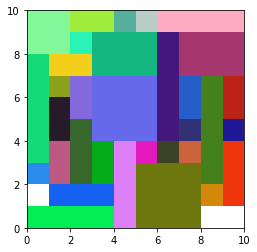

In [89]:
rect_master = []
'''
:param rect_master: 

rect_master is a master list that contains the parameters of all rectangles. 
It includes the starting point as [x,y], the width, and the height of the rectangle. 
An example of 3 rectangles appended into rect_master: [[[0,0],5,6],[[5,3],2,6],[[8,2],1,2]]

When referencing previous parameters of rectangles, the notation would be:
    rect_master[i][0][0] the x-coordinate of the ith rectangle
    rect_master[i][0][1] the y-coordinate of the ith rectangle
    rect_master[i][1] the width of the ith rectangle
    rect_master[i][2] the height of the ith rectangle

:type rect_master: list

'''

#initialize plot
%matplotlib inline
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')


'''
#This section generates n number of rectangles, where the user can choose n
n = 10

counter = 0
for i in range(n):
    generate_rectangle()
    counter += 1
    
print "Total number of rectangles is", counter
'''
    
    
counter = 0
while True:
    generate_rectangle()
    counter += 1  
    
    '''
    plot_filled = False
    
    for i in range(0, len(rect_master)):
        for x in range(0,limitx-1):
            print"x"
            
            for y in range(0,limity-1):
                print "y"
                if x >= rect_master[i][0][0] and x+1 <= rect_master[i][0][0]+rect_master[i][1] and y >= rect_master[i][0][1] and y+1 <= rect_master[i][0][1]+rect_master[i][2]:
                    break
                else: #if 
                    plot_filled == True
            break
        break
            
    if plot_filled == True:
        break
    '''
    
    '''    
    We use a set of rectangle plots and trim to check if entire plot is filled.
    If this rectangle is trimmed to have a valid dimension, there is space left on the board.
    If this rectangle is trimmed to have 0 height or width, then all spaces on the board is filled.
    '''
    full_starting, full_width, f_height = [0,0], limitx, limity
    rect_param = trim_rectangle(full_starting, full_width, full_height) 
    full_starting, full_width, full_height = rect_param[0],rect_param[1],rect_param[2]
    
    top_starting, top_width, top_height = [0,limity/2], limitx, limity/2
    rect_param = trim_rectangle(top_starting, top_width, top_height) 
    top_starting, top_width, top_height = rect_param[0],rect_param[1],rect_param[2]    
    
    bottom_starting, bottom_width, bottom_height = [0,0], limitx, limity/2
    rect_param = trim_rectangle(bottom_starting, bottom_width, bottom_height) 
    bottom_starting, bottom_width, bottom_height = rect_param[0],rect_param[1],rect_param[2]     

    left_starting, left_width, left_height = [0,0], limitx/2, limity
    rect_param = trim_rectangle(left_starting, left_width, left_height) 
    left_starting, left_width, left_height = rect_param[0],rect_param[1],rect_param[2]  

    right_starting, right_width, right_height = [limitx/2,0], limitx/2, limity
    rect_param = trim_rectangle(right_starting, right_width, right_height) 
    right_starting, right_width, right_height = rect_param[0],rect_param[1],rect_param[2]     
    
    fourth_starting, fourth_width, fourth_height = [0,0], limitx/4, limity/4
    rect_param = trim_rectangle(fourth_starting, fourth_width, fourth_height) 
    fourth_starting, fourth_width, fourth_height = rect_param[0],rect_param[1],rect_param[2]    
    
    
    if (full_width == 0 or full_height==0) and (top_width == 0 or top_height == 0) and (bottom_width == 0 or bottom_height == 0) and (left_width == 0 or left_height == 0) and (right_width == 0 or right_height == 0) and (fourth_width == 0 or fourth_height == 0):
        break
    

print "Total number of rectangles generated is", counter



In [ ]:
#sampled 30 iterations, computed the average number of rectangles as 29

#sum([15,34,14,24,22,12,31,14,39,28,23,39,27,34,29,47,44,41,36,39,37,44,29,33,39,12,24,29,31,22])/30